In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 112s 1us/step


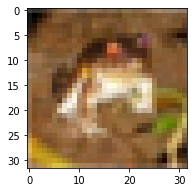

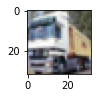

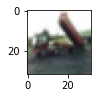

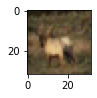

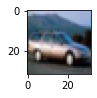

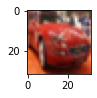

In [3]:
# Plotting some images from the dataset
n = 6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(X_train[i])
    plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.constraints import maxnorm

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

### Performing One Hot Encoding

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

### Creating Model

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(32,32,3),
                padding = 'same', activation="relu",
                kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [13]:
sgd = SGD(lr=0.01, momentum=0.9, decay=(0.01/25), nesterov=False)
model.compile(loss="categorical_crossentropy", 
             optimizer=sgd, metrics=["accuracy"])

C:\Users\Aniket\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [15]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 265s 169ms/step - loss: 1.7055 - accuracy: 0.3850 - val_loss: 1.4313 - val_accuracy: 0.4817
Epoch 2/10
1563/1563 [==============================] - 267s 171ms/step - loss: 1.3482 - accuracy: 0.5113 - val_loss: 1.2278 - val_accuracy: 0.5643
Epoch 3/10
1563/1563 [==============================] - 266s 170ms/step - loss: 1.1803 - accuracy: 0.5770 - val_loss: 1.0888 - val_accuracy: 0.6144
Epoch 4/10
1563/1563 [==============================] - 264s 169ms/step - loss: 1.0496 - accuracy: 0.6257 - val_loss: 1.0192 - val_accuracy: 0.6371
Epoch 5/10
1563/1563 [==============================] - 261s 167ms/step - loss: 0.9445 - accuracy: 0.6630 - val_loss: 0.9757 - val_accuracy: 0.6607
Epoch 6/10
1563/1563 [==============================] - 261s 167ms/step - loss: 0.8614 - accuracy: 0.6932 - val_loss: 0.9467 - val_accuracy: 0.6706
Epoch 7/10
1563/1563 [==============================] - 263s 168ms/step - loss: 0.7920 - accuracy: 0.7181 - val_

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 11s 36ms/step - loss: 0.9150 - accuracy: 0.6922


[0.9149515628814697, 0.6922000050544739]

In [17]:
model.save("model1_cifar_10epoch.h5")

In [18]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}


In [20]:
import os

In [30]:
from PIL import Image
import numpy as np

im = Image.open("image_path/horse1.jpg")
# the input image is required to be in the shape of dataset i., (32,32,3)
im = im.resize((32,32))
im = np.expand_dims(im, axis=0)
im = np.array(im)
pred = model.predict_classes([im])[0]
print(pred, results[pred])

7 horse


### Creating a GUI 


In [31]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [32]:
from keras.models import load_model
model = load_model("model1_cifar_10epoch.h5")

In [33]:
classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}

In [42]:
# intialise GUI
top = tk.Tk()
top.geometry('600x500')
top.title('Image Classification CIFAR10')
top.configure(background = '#CDCDCD')
label = Label(top, background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

horse
dog
